11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step


C:\Users\hassa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8975 - loss: 0.3364 - val_accuracy: 0.9848 - val_loss: 0.0559
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9840 - loss: 0.0550 - val_accuracy: 0.9888 - val_loss: 0.0389
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9890 - loss: 0.0339 - val_accuracy: 0.9905 - val_loss: 0.0371
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9917 - loss: 0.0227 - val_accuracy: 0.9908 - val_loss: 0.0333
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9944 - loss: 0.0165 - val_accuracy: 0.9910 - val_loss: 0.0357
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9866 - loss: 0.0353
✅ Test Accuracy: 0.9903


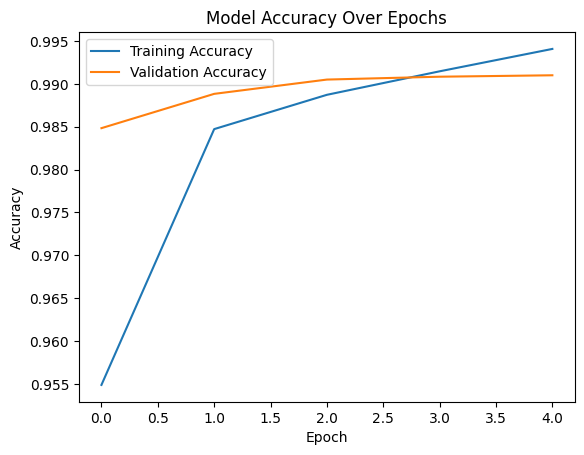

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


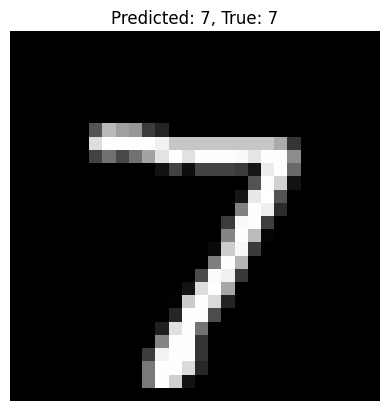

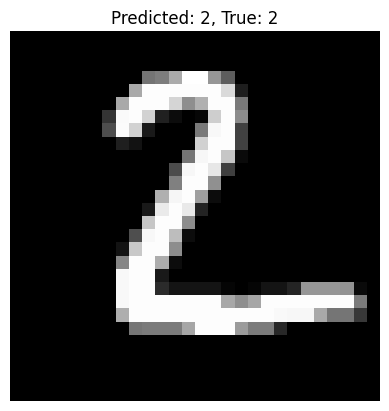

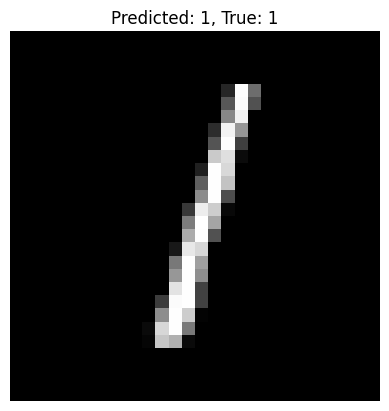

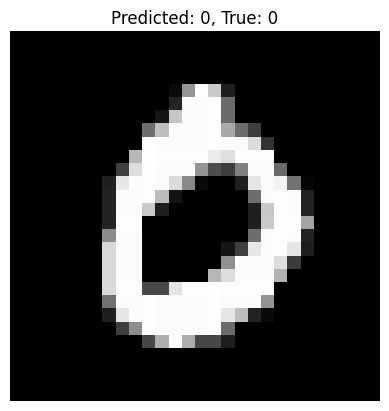

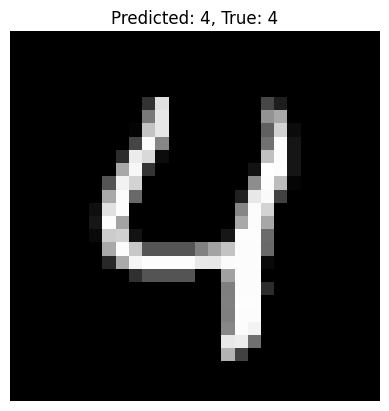

In [1]:
# 🧮 Task 2: Handwritten Digit Classification using TensorFlow (CNN)

# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 2. Load and Preprocess Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN [samples, height, width, channels]
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 3. Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 5. Train Model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# 6. Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# 7. Plot Accuracy Graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 8. Show 5 Sample Predictions
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()
